In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.animation import FuncAnimation

import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.dpi']= 200

plt.style.use('my_style.mplstyle')

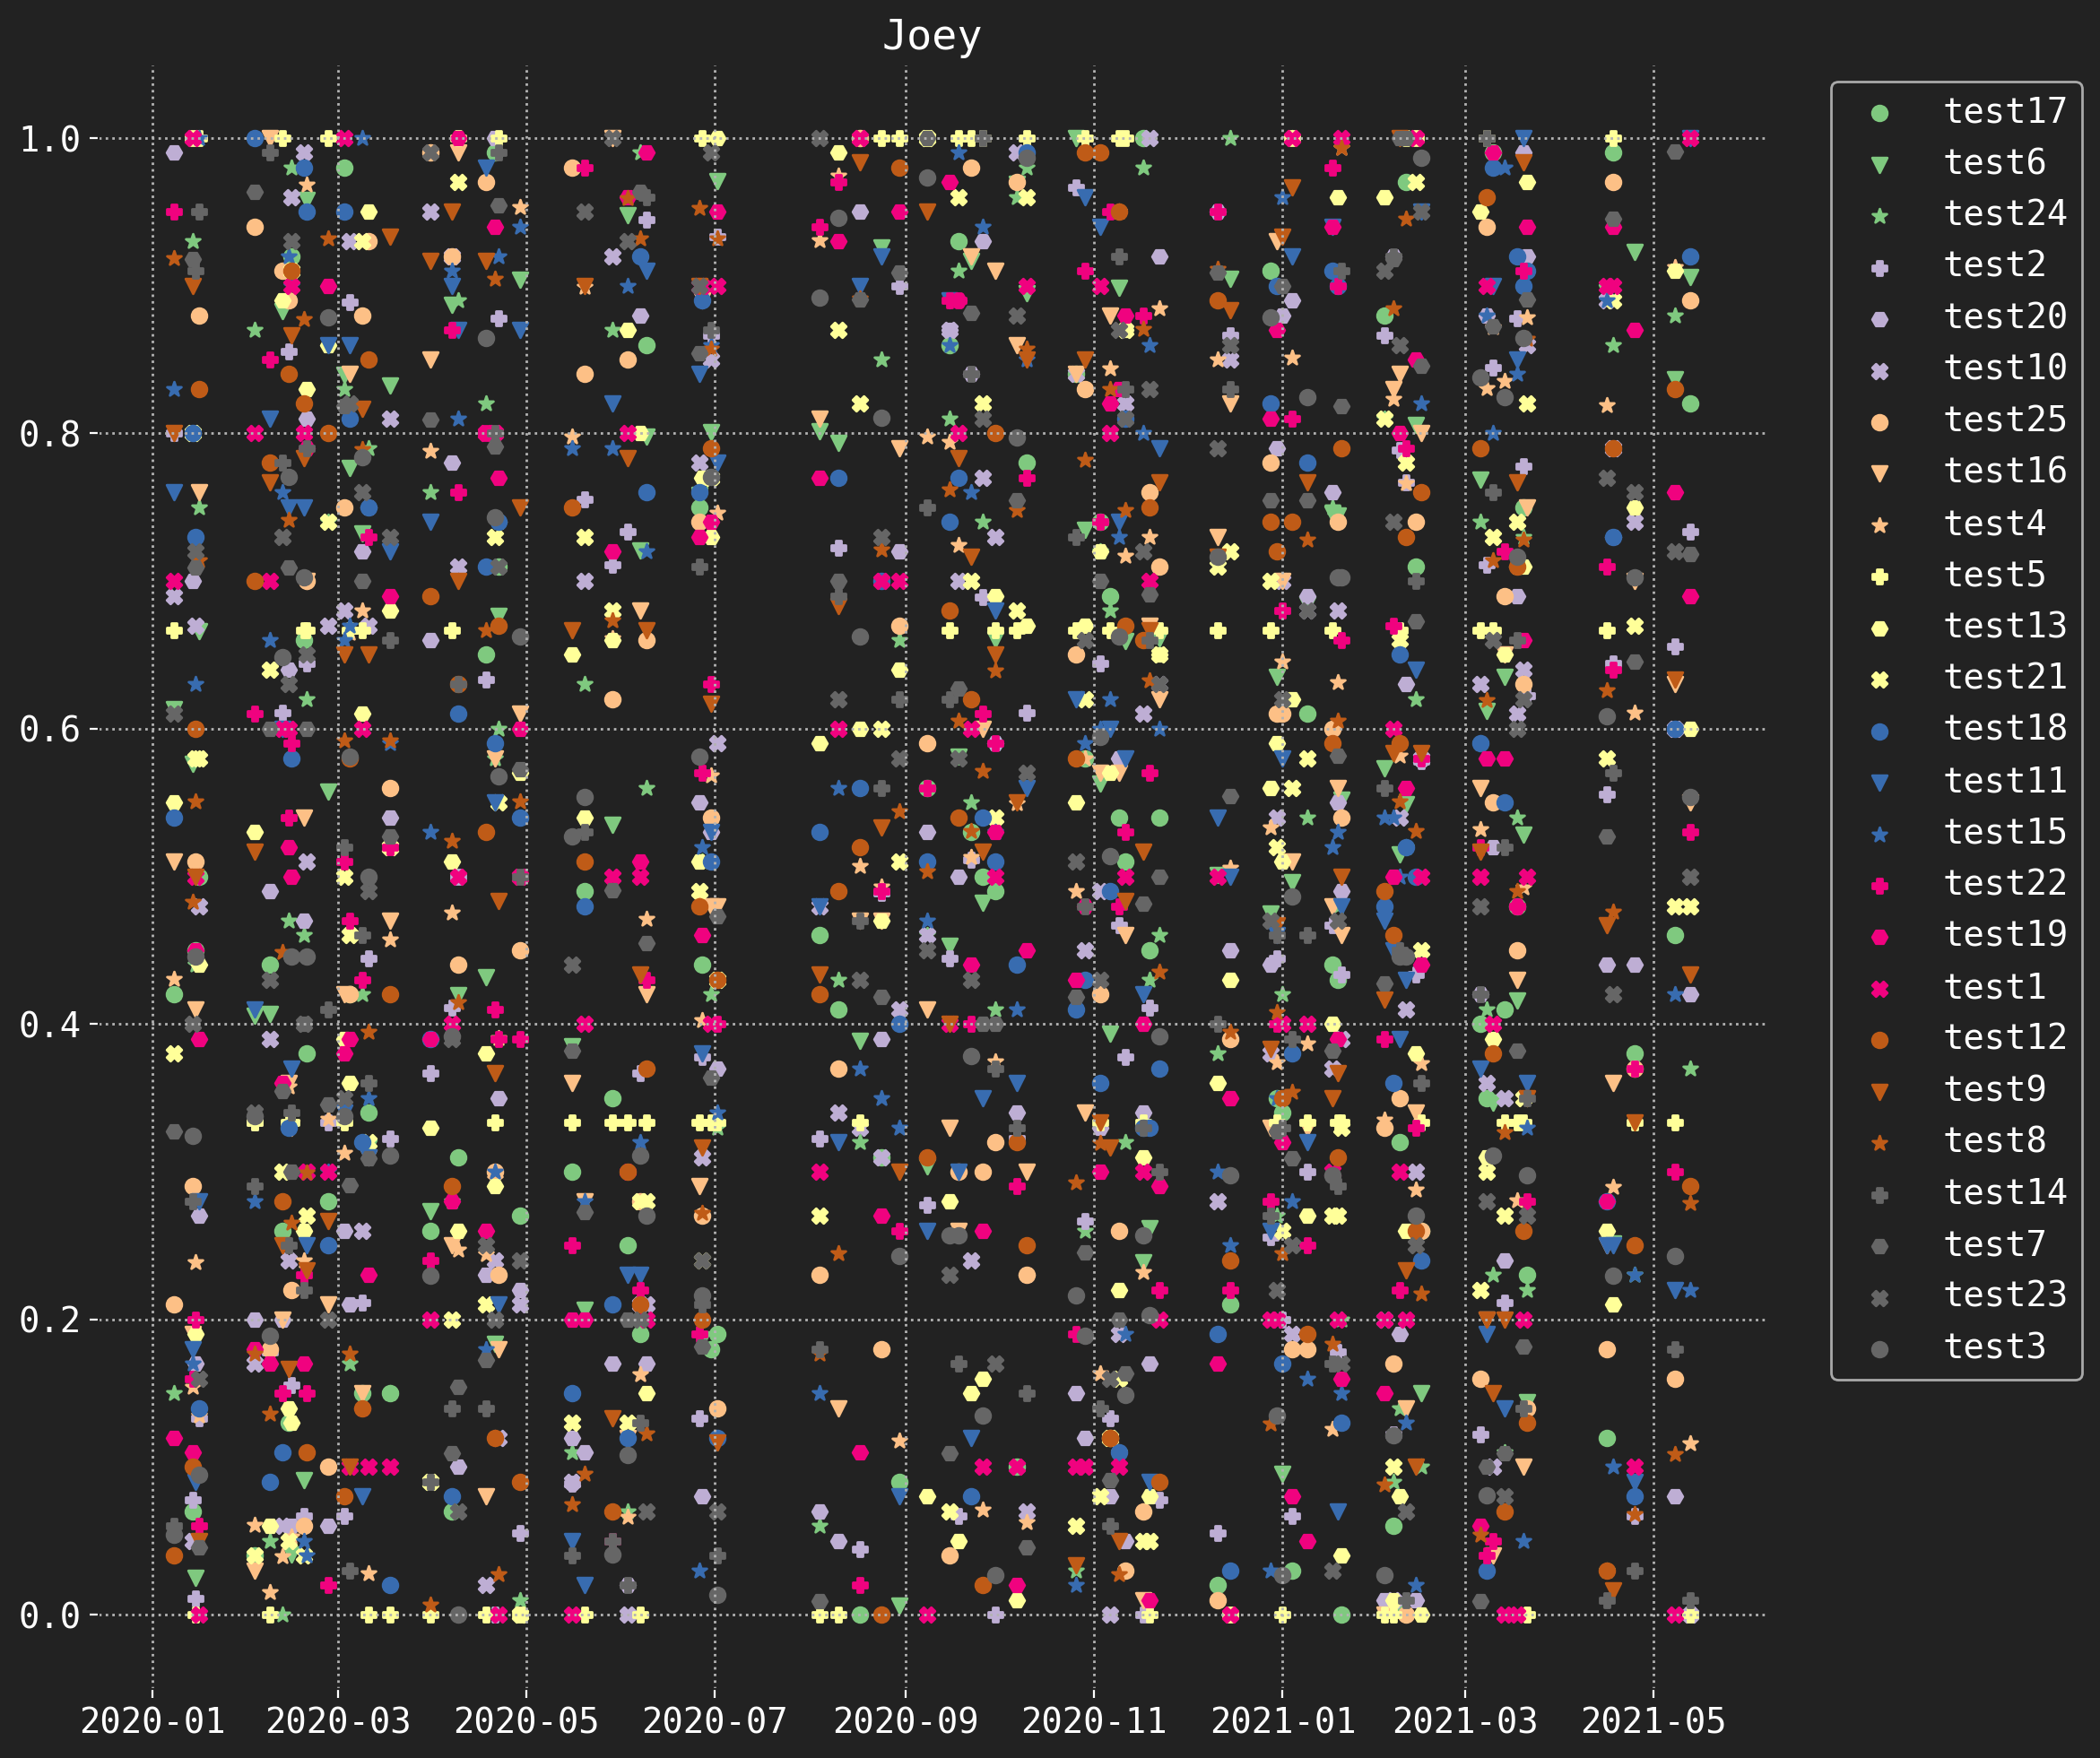

In [14]:
df1 = pd.read_csv('data1.csv')
df1['date'] = pd.to_datetime(df1['date'])

name = 'Joey'

colors = {}
my_colormap = plt.cm.get_cmap('Accent', 25)
for i, test_name in enumerate(set(df1.test)):
    colors[test_name] = my_colormap(i)
    
markers = ['o', 'v', '*', 'P', 'H', 'X']

fig, ax = plt.subplots(figsize=(12,12))
ax.grid(color = (0.7,0.7,0.7), linestyle='dotted', linewidth=1)

df2 = df1.loc[df1.Name == name]

for i,test in enumerate(set(df2.test)):
    data = df2.loc[df2.test == test]
    ax.scatter(x = data.date, y = data.value, color = colors[test], label= test, marker=markers[i%6])
ax.legend(loc='upper right', bbox_to_anchor=(1.20, 1))
ax.set_title(name)

plt.show()

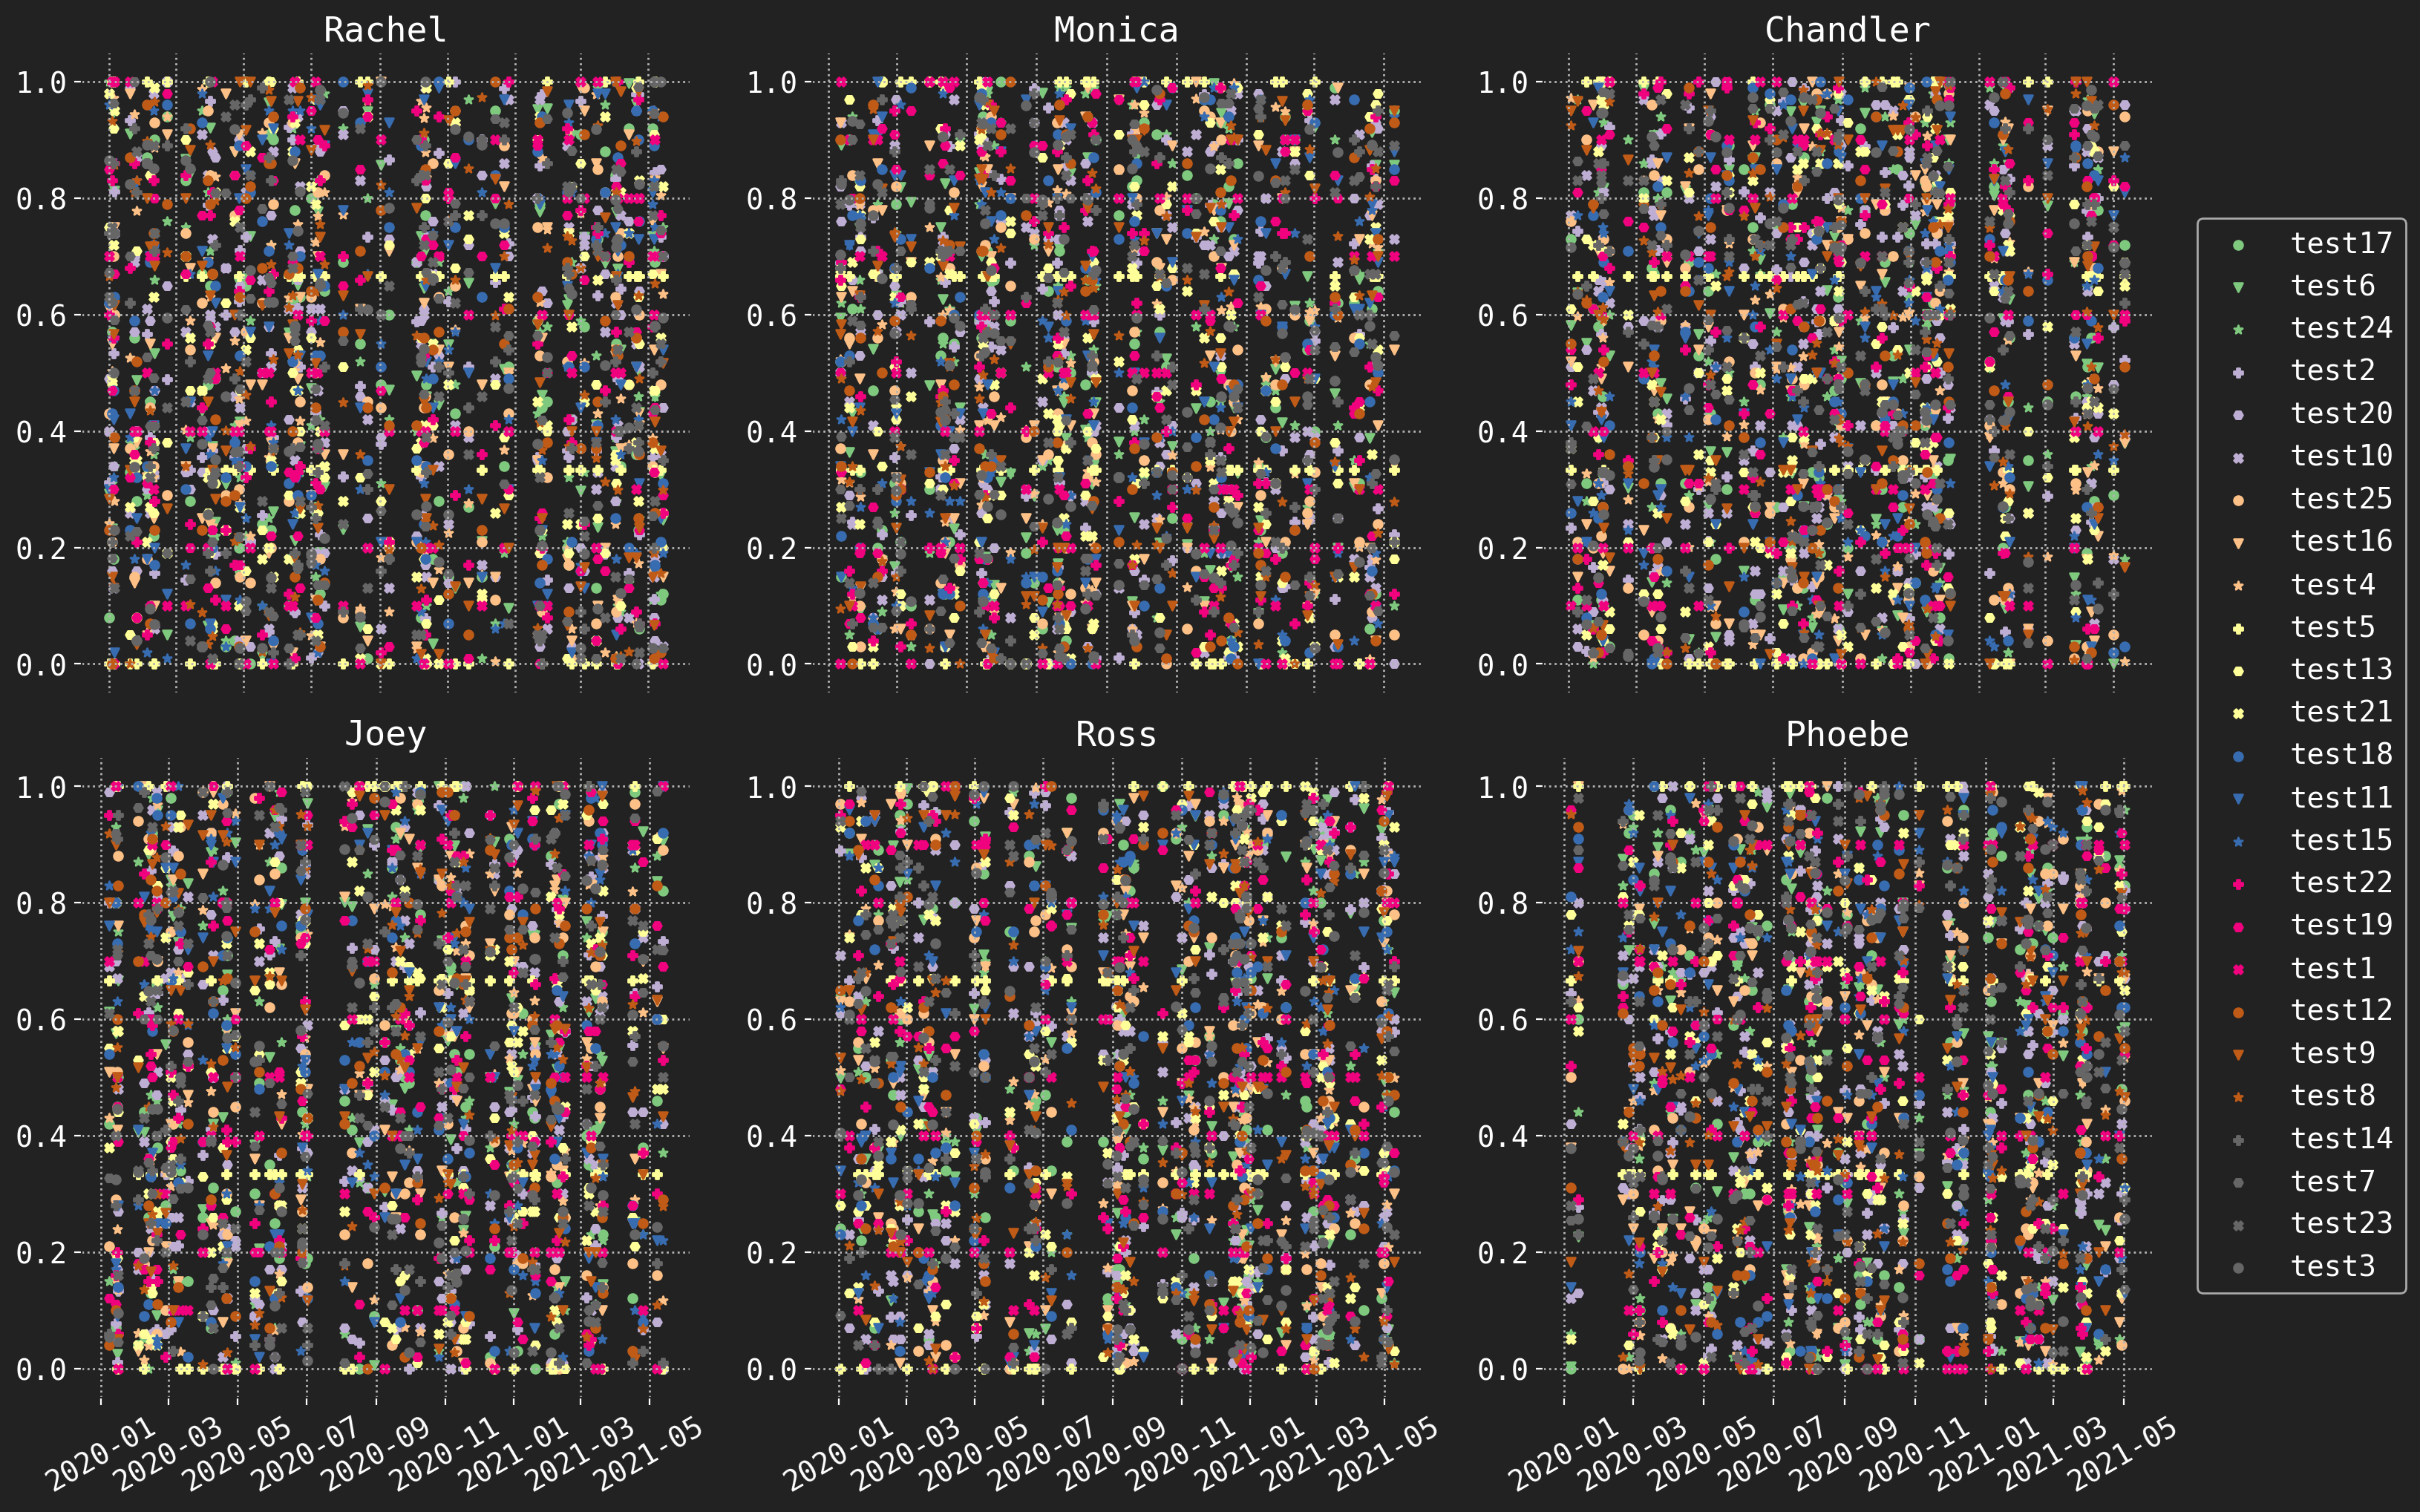

In [33]:
names = set(df1.Name)
fig = plt.figure(figsize=(18, 12))
outer  = gridspec.GridSpec(2, 3, wspace=0.2, hspace=0.1)
for i,name in enumerate(names):
    ax.grid(color = (0.7,0.7,0.7), linestyle='dotted', linewidth=1)
    for j,test in enumerate(set(df1.test)):
        ax = plt.subplot(outer[i])
        data = df1.loc[df1.Name == name].loc[df1.test == test]
        if(i<3):
            ax.tick_params(
            axis='x',          
            which='both',      
            bottom=False,     
            top=False,         
            labelbottom=False) 
        if(i<5):
            ax.scatter(x = data.date, y = data.value, color = colors[test], marker=markers[j%6], s=18)
        else:
            ax.scatter(x = data.date, y = data.value, color = colors[test], label = test, marker=markers[j%6], s=18)
            ax.grid(color = (0.7,0.7,0.7), linestyle='dotted', linewidth=1)
        plt.xticks(rotation=30)
        ax.set_title(name)
fig.legend(loc='center right')
fig.show()

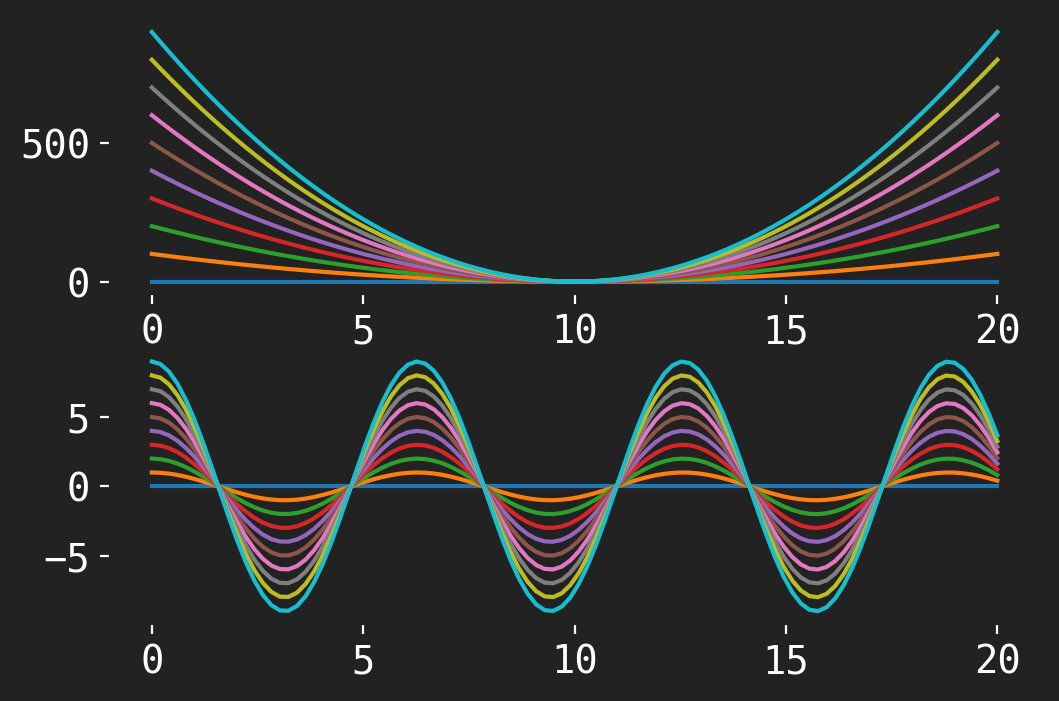

In [16]:
x = np.linspace(0, 20, 100)

fig, axes = plt.subplots(nrows=2)

for i in range(10):
    axes[0].plot(x, i * (x - 10)**2)

for i in range(10):
    axes[1].plot(x, i * np.cos(x))

plt.show()

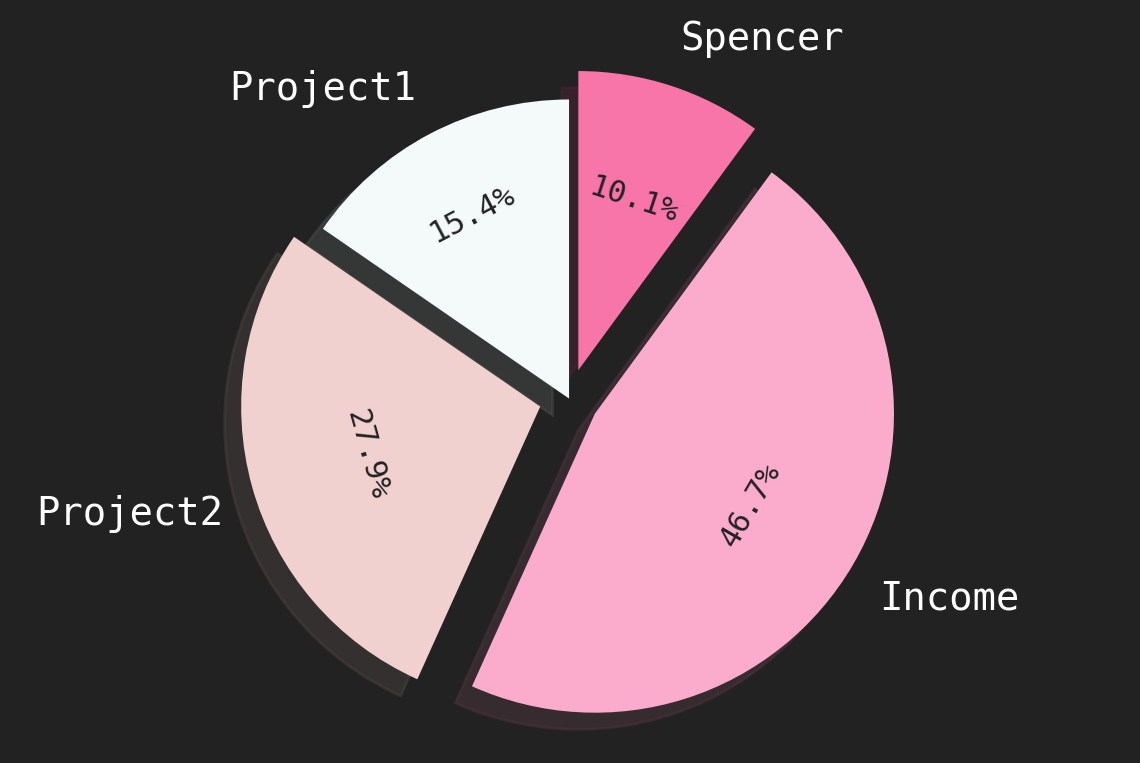

In [110]:
labels = ['Project1', 'Project2', 'Income', 'Spencer']
sizes = [15.3, 27.7, 46.4, 10]
#colors
colors = ['#f4f9f9','#f1d1d0','#fbaccc','#f875aa']

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0.1, 0.1)

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,
                                    rotatelabels =True, explode = explode, shadow=True)
for patch, autotext in zip(patches, autotexts):
    autotext.set_fontsize(11)
    ang = (patch.theta2 + patch.theta1) / 2.
    x = patch.r * 0.7 * np.cos(ang*np.pi/180)
    y = patch.r * 0.7 * np.sin(ang*np.pi/180)
    autotext.set_position((x, y))
    autotext.set_color((0.133, 0.133, 0.133))

for label, autotext in zip(texts, autotexts):
    rot = label.get_rotation()
    autotext.set_rotation(rot+90+(1-rot//180)*180)
    label.set_rotation(0)
#draw circle
#centre_circle = plt.Circle((0,0),0.70,fc=(0.133, 0.133, 0.133))
fig = plt.gcf()
#fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

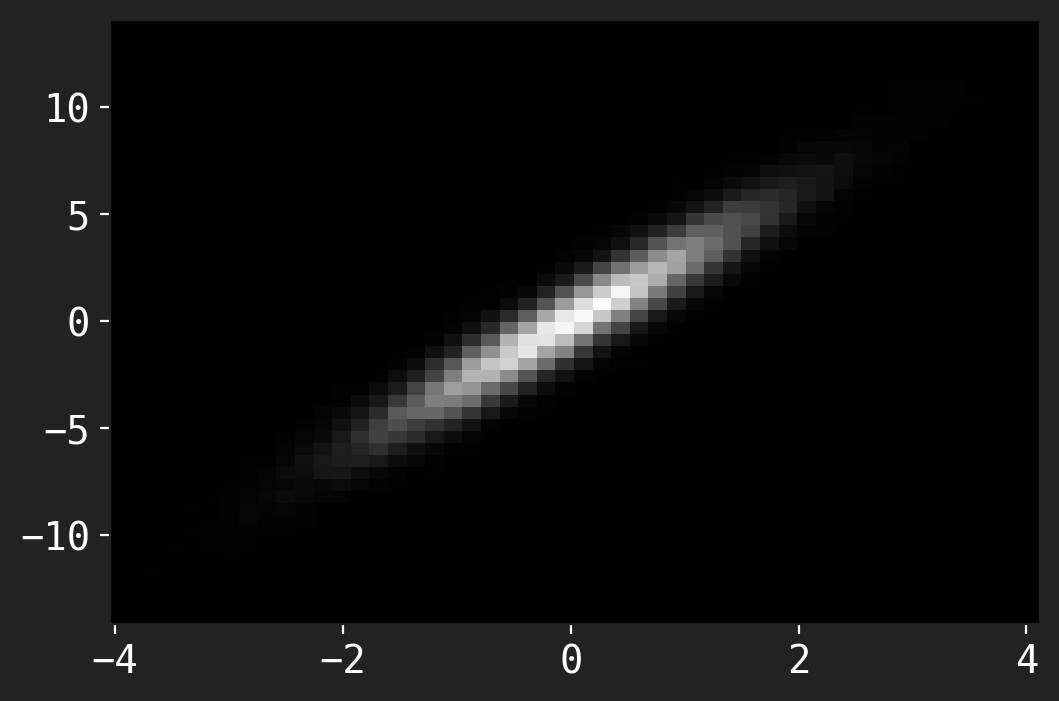

In [21]:
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)

plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.binary_r)
plt.show()

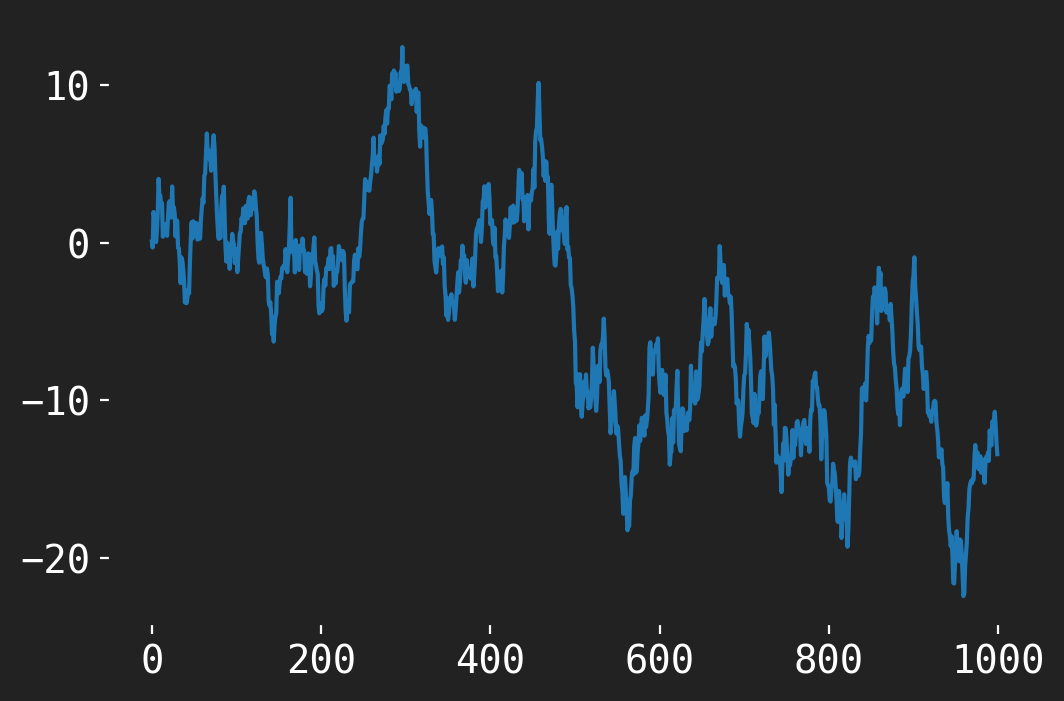

In [23]:
values=np.cumsum(np.random.randn(1000,1))

# use the plot function
plt.plot(values)

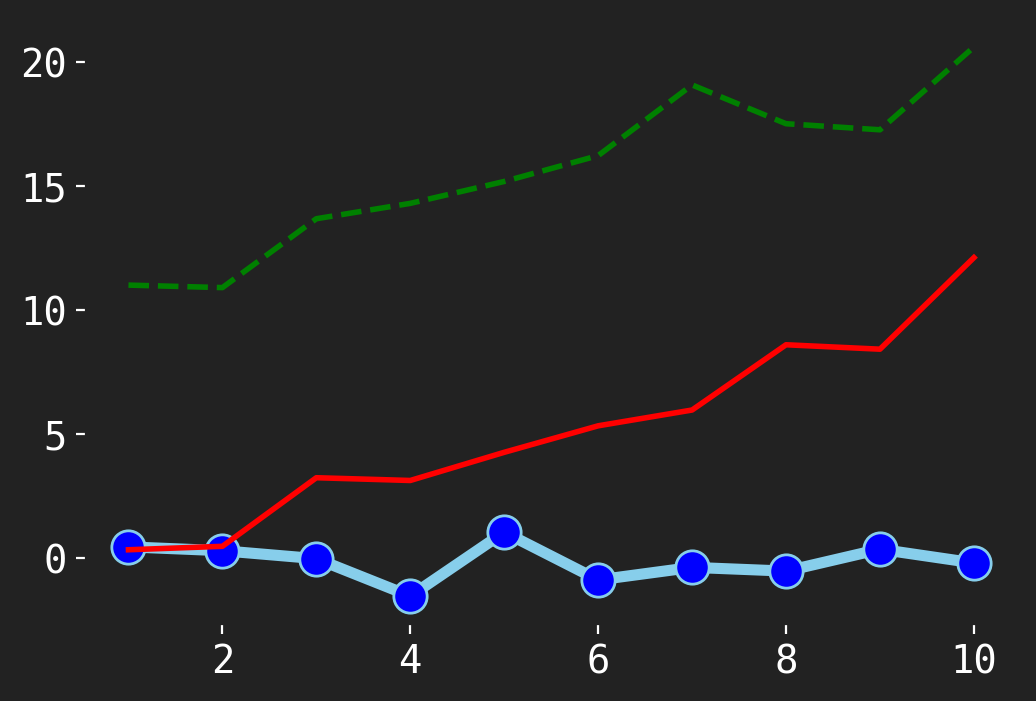

In [32]:
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
 
# multiple line plots
plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x_values', 'y2_values', data=df, marker='', color='red', linewidth=2)
plt.plot( 'x_values', 'y3_values', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="toto")

# show graph
plt.show()

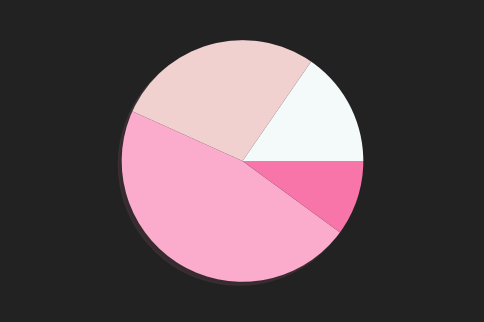

In [12]:
mpl.rcParams['figure.dpi']= 100
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.axis('equal')
    labels = ['Project1', 'Project2', 'Income', 'Spencer']
    sizes = [15.3, 27.7, 46.4, 10]
    colors = ['#f4f9f9','#f1d1d0','#fbaccc','#f875aa']
    rot = i*10%360
    explode = (0, 0, 0, 0)
    if (i > 50):
        explode = (0, 0.1, 0.1, 0.1)
        patches, texts, autotexts = ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=500%360,
                                    rotatelabels =True, explode = explode, shadow=True)
        for patch, autotext in zip(patches, autotexts):
            autotext.set_fontsize(11)
            ang = (patch.theta2 + patch.theta1) / 2.
            x = patch.r * 0.7 * np.cos(ang*np.pi/180)
            y = patch.r * 0.7 * np.sin(ang*np.pi/180)
            autotext.set_position((x, y))
            autotext.set_color((0.133, 0.133, 0.133))

        for label, autotext in zip(texts, autotexts):
            rot = label.get_rotation()
            autotext.set_rotation(rot+90+(1-rot//180)*180)
            label.set_rotation(0)
        
    else:
        ax.pie(sizes, colors = colors, startangle=rot,
                                    rotatelabels =True, explode = explode, shadow=True)
    
anim = FuncAnimation(fig, animate, frames=range(100), repeat=False)
anim.save('pie.gif', writer='imagemagick')
plt.show()

![SegmentLocal](pie.gif "segment")